In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [145]:
oportunidades = pd.read_csv('Entrenamiento_ECI_2020.csv')
oportunidades['Account_Created_Date'] = pd.to_datetime(oportunidades['Account_Created_Date'])
oportunidades['Opportunity_Created_Date'] = pd.to_datetime(oportunidades['Opportunity_Created_Date'])
oportunidades['Quote_Expiry_Date'] = pd.to_datetime(oportunidades['Quote_Expiry_Date'])
oportunidades['Last_Modified_Date'] = pd.to_datetime(oportunidades['Last_Modified_Date'])
oportunidades['Planned_Delivery_Start_Date'] = pd.to_datetime(oportunidades['Planned_Delivery_Start_Date'])
oportunidades['Planned_Delivery_End_Date'] = pd.to_datetime(oportunidades['Planned_Delivery_End_Date'])
oportunidades.head(5)



,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [146]:
oportunidades_EMEA = oportunidades[oportunidades['Region'] == 'EMEA']
# oportunidades_EMEA_cerradas = oportunidades_EMEA[oportunidades_EMEA['Stage'] == 'Closed Won' or oportunidades_EMEA['Stage'] == 'Closed Lost']
oportunidades_EMEA_cerradas = oportunidades_EMEA[['Stage', 'Planned_Delivery_End_Date','Account_Created_Date','Opportunity_Created_Date']]
# oportunidades_EMEA_cerradas['Oportunity_Created_Year'] = 
oportunidades_EMEA_cerradas['Opportunity_Created_Date'].values
year = np.array(oportunidades_EMEA_cerradas['Opportunity_Created_Date'], dtype=np.datetime64)
year = pd.to_datetime(year).year
oportunidades_EMEA_cerradas['Opportunity_Created_Year'] = year
oportunidades_EMEA_cerradas['Opportunity_Created_Year'].value_counts()

2017    1899
2018    1459
2016    1103
2015     198
2014       4
2013       1
Name: Opportunity_Created_Year, dtype: int64

In [155]:
oportunidades_por_anio = oportunidades_EMEA_cerradas.groupby('Opportunity_Created_Year').agg({'Stage':'value_counts'})
oportunidades_por_anio = oportunidades_por_anio.unstack().reset_index()
oportunidades_por_anio 
level_0 = oportunidades_por_anio.columns.get_level_values(0)
level_menos1 = oportunidades_por_anio.columns.get_level_values(-1)
oportunidades_por_anio.columns = level_0 + '_' + level_menos1
oportunidades_por_anio = oportunidades_por_anio[['Opportunity_Created_Year_','Stage_Closed Lost','Stage_Closed Won']]

oportunidades_por_anio


,Opportunity_Created_Year_,Stage_Closed Lost,Stage_Closed Won
0,2013,1.0,NaN
1,2014,3.0,1.0
2,2015,125.0,73.0
3,2016,642.0,461.0
4,2017,725.0,1173.0
5,2018,693.0,763.0


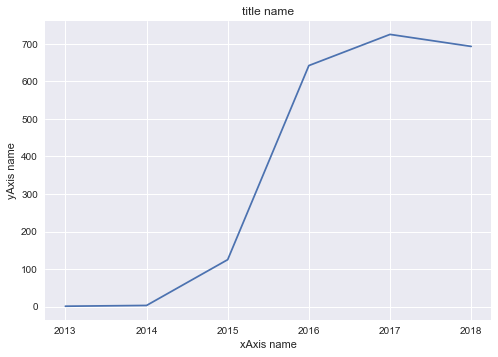

In [156]:
plt.plot(oportunidades_por_anio['Opportunity_Created_Year_'],oportunidades_por_anio['Stage_Closed Lost'])
plt.title('Oportunidades de EMEA en Closed Lost segun los')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.show()